In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_input_file(input_file_path):
    wine_data = pd.read_csv(input_file_path)
    return wine_data

In [3]:
wine_dataset = read_input_file("C:/Users/admin/Desktop/neha project/wine data/winequality_white.csv")
print(wine_dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [4]:
print(wine_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
input_vars = wine_dataset.drop(wine_dataset.columns[-1],axis=1)
print(input_vars)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [6]:
output_var = pd.DataFrame(wine_dataset['quality'])
print(output_var)
print(type(output_var))

      quality
0           6
1           6
2           6
3           6
4           6
...       ...
4893        6
4894        5
4895        6
4896        7
4897        6

[4898 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


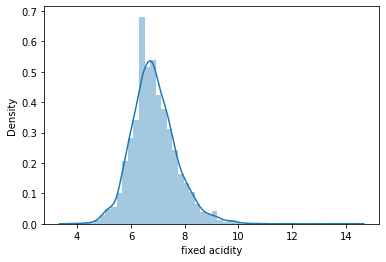

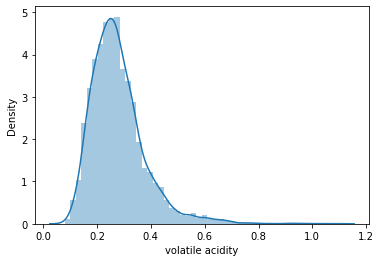

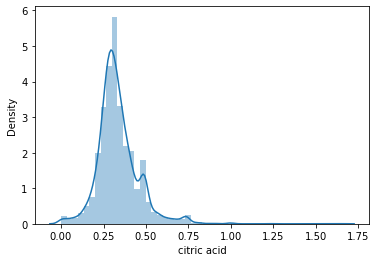

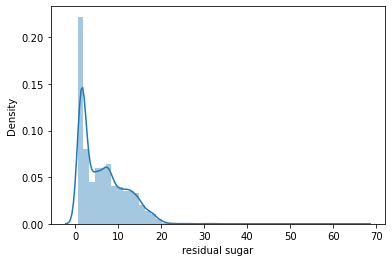

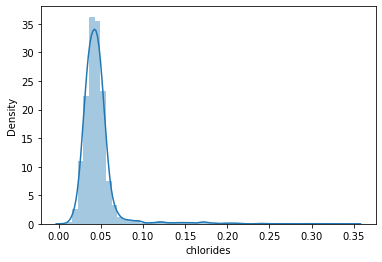

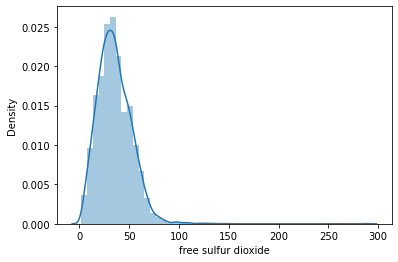

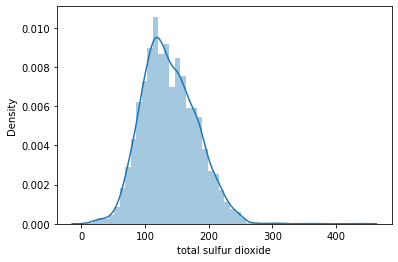

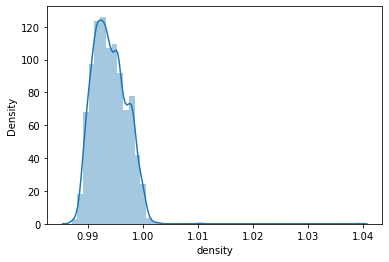

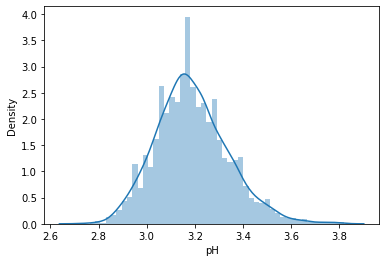

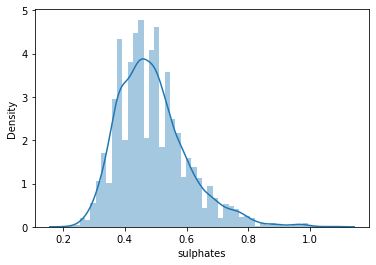

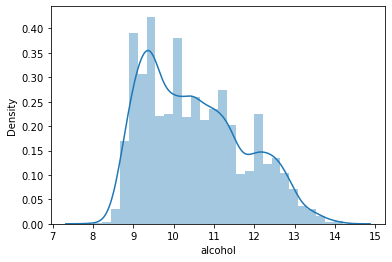

In [7]:
for col in input_vars.columns:
    sns.distplot(input_vars[col])
    plt.show()

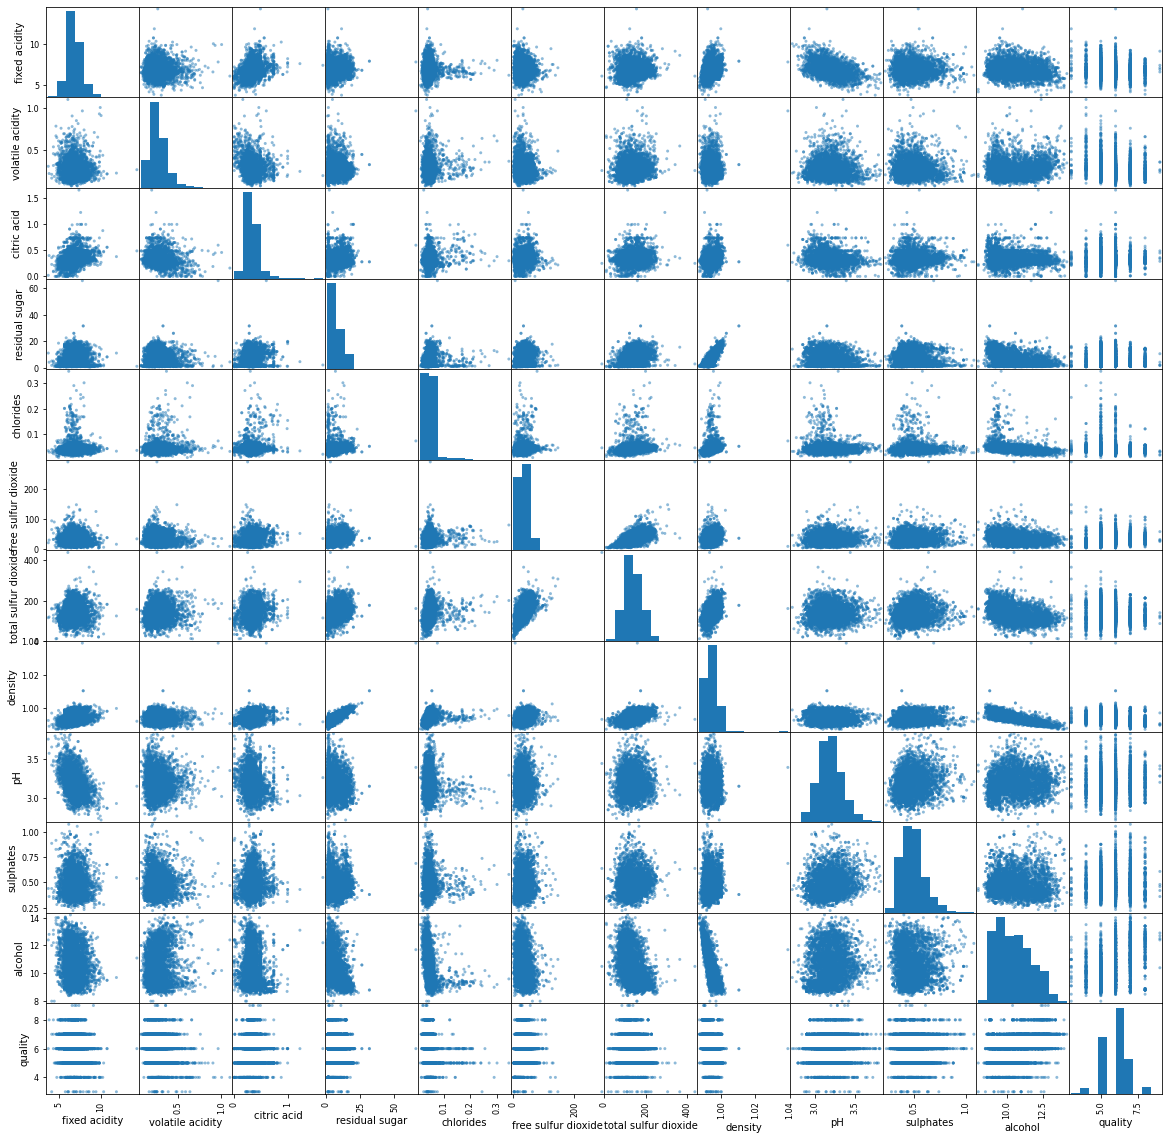

In [8]:
pd.plotting.scatter_matrix(wine_dataset,figsize=(20,20))
plt.show()

In [9]:
print(wine_dataset.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [11]:
x = input_vars.iloc[:,:].values
y = output_var.iloc[:,:].values
print(x)
print(y)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[[6]
 [6]
 [6]
 ...
 [6]
 [7]
 [6]]


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

[[ 0.41960224 -0.18345438 -0.10617414 ...  0.27871789 -0.0037976
  -0.01506672]
 [-1.76149438  0.11564025  0.39441585 ...  0.61037576 -1.12837151
   1.52572884]
 [-0.428602    1.81050983 -0.18960581 ...  0.47771261  0.94776495
   0.79587831]
 ...
 [ 1.26780648  0.5144331  -0.4399008  ... -0.2519347  -0.95536014
  -1.39367327]
 [ 2.47952682 -0.18345438 -0.02274248 ... -0.38459785 -0.26331465
   0.22821679]
 [ 1.26780648  2.30900089  0.06068919 ... -0.64992414  0.16921378
  -0.42053923]]


In [13]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [14]:
model.score(x_test,y_test)

0.5755102040816327

In [15]:
no_of_features = np.arange(1,12)
score1 = 0
high_score = 0
for i in no_of_features:
    model1=DecisionTreeClassifier()
    rfe=RFE(model1,i)
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model1.fit(x_train_rfe,y_train)
    score1 = model1.score(x_test_rfe,y_test)
    if score1>high_score:
        high_score=score1
        print("optimal features::",i)
        print(score1)
        print(rfe.support_)

optimal features:: 1
0.40816326530612246
[False False False False False  True False False False False False]
optimal features:: 2
0.46938775510204084
[False False False False False  True False False  True False False]
optimal features:: 3
0.5530612244897959
[False False False False False  True False  True False False  True]
optimal features:: 4
0.5622448979591836
[False False False False False  True  True  True False False  True]
optimal features:: 7
0.5693877551020409
[False  True False  True  True  True False False  True  True  True]
optimal features:: 8
0.5877551020408164
[False  True  True False  True  True False  True  True  True  True]
optimal features:: 9
0.6040816326530613
[False  True False  True  True  True  True  True  True  True  True]


In [16]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)
rfr.predict(x_test)
score = rfr.score(x_test,y_test)
score

0.6632653061224489

In [17]:
no_of_features = np.arange(1,12)
score1 = 0
high_score = 0
for i in no_of_features:
    model1=RandomForestClassifier()
    rfe=RFE(model1,i)
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model1.fit(x_train_rfe,y_train)
    score1 = model1.score(x_test_rfe,y_test)
    if score1>high_score:
        high_score=score1
        print("optimal features::",i)
        print(score1)
        print(rfe.support_)

optimal features:: 1
0.45714285714285713
[False False False False False False False  True False False False]
optimal features:: 2
0.563265306122449
[False False False False False False  True  True False False False]
optimal features:: 3
0.6030612244897959
[False False False  True False False  True  True False False False]
optimal features:: 4
0.6142857142857143
[False False False  True False  True  True  True False False False]
optimal features:: 5
0.6183673469387755
[False False False  True False  True  True  True False False  True]
optimal features:: 6
0.6418367346938776
[False  True False  True False  True  True  True False False  True]
optimal features:: 8
0.6551020408163265
[False  True False  True  True  True  True  True  True False  True]
optimal features:: 10
0.6561224489795918
[False  True  True  True  True  True  True  True  True  True  True]


In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc.predict(x_test)
score = svc.score(x_test,y_test)
score

0.539795918367347

Best accuracy can be seen in RandomForestClassifier